In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.models import load_model

In [64]:
Tk().withdraw()
file_path= askopenfilename(title='이미 파일을 선택하세요',filetypes=[('Image Files','*.png')])
print("선택한 파일:",file_path)

선택한 파일: C:/ai_project01/8_test.png


In [65]:
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [66]:
image.shape

(175, 300)

In [67]:
image=cv2.resize(image,(28,28))
image.shape

(28, 28)

In [68]:
image=255-image
image = image/255.0


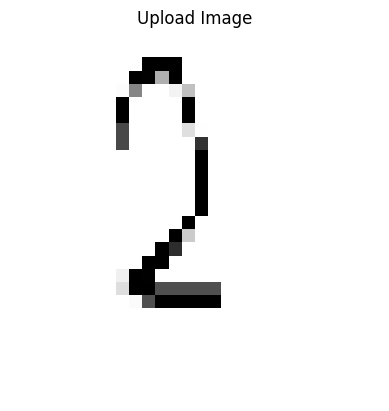

In [69]:
plt.imshow(image.squeeze(),cmap='gray_r')
plt.title("Upload Image")
plt.axis('off')
plt.show()

In [70]:
model = load_model('best_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [71]:
image_input= image.reshape(1,784)
prediction = model.predict(image_input)
prediction

1/1 [==============================] - 0s 53ms/step


array([[1.8841267e-06, 1.5591215e-05, 9.9987400e-01, 2.5241647e-05,
        7.8508585e-08, 8.2115082e-07, 7.4300209e-05, 3.5744283e-06,
        4.5935367e-06, 2.5216730e-08]], dtype=float32)

In [72]:
predicted_class = np.argmax(prediction)
print(f"예측숫자:{predicted_class}")

예측숫자:2
